# Customer Churn - Project 1

Customer churn prediction learning why customers are leaving a business in telcome business. We build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

Dataset is retrieved from kaggle - https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID',axis='columns', inplace=True)


In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values  #this is a string and we need to chane it to numeric

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df1 = df[df.TotalCharges != ' '] #removing this data where total chardes = blank (because only fe number of data)
df1.shape

(7032, 20)

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

/var/folders/c4/ww_k7qj14xl84rn05_d1nsbr0000gn/T/ipykernel_36920/973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [11]:
df1[df1.Churn=='No'].shape

(5163, 20)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


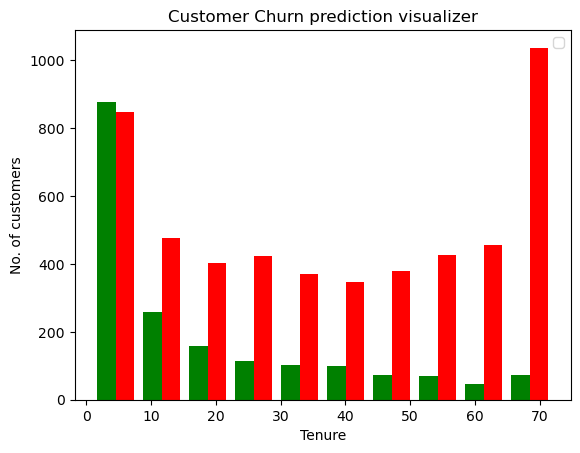

In [12]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("No. of customers")
plt.title("Customer Churn prediction visualizer")

plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'])
plt.legend()

## Need to replace object values to new form of values before creating a model


In [13]:
def print_uni_col_val(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column} : {df[column].unique()}')

In [14]:
print_uni_col_val(df1) # calling functions on all categorical columns

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [15]:
# Replacing values
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/var/folders/c4/ww_k7qj14xl84rn05_d1nsbr0000gn/T/ipykernel_36920/812919093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/var/folders/c4/ww_k7qj14xl84rn05_d1nsbr0000gn/T/ipykernel_36920/812919093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [16]:
print_uni_col_val(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [17]:
yes_no_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
              'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for column in yes_no_col:
    df1[column].replace({'Yes':1,'No':0},inplace=True)

/var/folders/c4/ww_k7qj14xl84rn05_d1nsbr0000gn/T/ipykernel_36920/1465628034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column].replace({'Yes':1,'No':0},inplace=True)


In [18]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [19]:
df1['gender'].replace({'Female':0,'Male':1},inplace=True)

/var/folders/c4/ww_k7qj14xl84rn05_d1nsbr0000gn/T/ipykernel_36920/4018057419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':0,'Male':1},inplace=True)


In [20]:
for column in df1:
    print(f'{column} : {df1[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


## Changing formats with values more than 2 - One Hot Encoding

In [21]:
#pd.get_dummies(data=df1, columns=['InternetService'])
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [22]:
bool_con=['InternetService_DSL','InternetService_Fiber optic','InternetService_No','Contract_Month-to-month',
         'Contract_One year','Contract_Two year','PaymentMethod_Bank transfer (automatic)',
         'PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']

for column in bool_con:
    df2[column] = df2[column].astype(int)


#df2['InternetService_DSL'] = df2['InternetService_DSL'].astype(int)

In [23]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

### Now all the columns are either float or int. Most of them are 0/1 and some others require scaling

In [24]:
col_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[col_scale] = scaler.fit_transform(df2[col_scale])

In [25]:
for column in df2:
    print(f'{column} : {df2[column].unique()}')

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0 1]
MultipleLines : [0 1]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
Tech

# ----------------------- Date Processing Done--------------------------------

In [35]:
# to show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [36]:
df2[:5]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,0,0,0,1,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,0,0,0,0,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,0,0,0,1,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,1,0,0,0,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,0,0,0,1,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0


In [37]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [43]:
X.shape

(7032, 26)

In [44]:
y.shape

(7032,)

In [117]:
#Splitting data fro training and testing ---- 80% sample for training / 20% for Testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [118]:
X_train.shape

(5625, 26)

In [119]:
len(X_train.columns)

26

In [120]:
# Creating a neural network

import tensorflow as tf
from tensorflow import keras

#modelling
model = keras.Sequential([
    keras.layers.Dense(units=20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(units=30, activation='relu'),
    keras.layers.Dense(units=40, activation='relu'),
    keras.layers.Dense(units=1, activation='sigmoid')
])

#model compilation
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

#Model Fitting
model.fit(X_train, y_train, epochs=500)


Epoch 1/500
176/176 [==============================] - 0s 383us/step - loss: 0.4746 - accuracy: 0.7646
Epoch 2/500
176/176 [==============================] - 0s 368us/step - loss: 0.4279 - accuracy: 0.7968
Epoch 3/500
176/176 [==============================] - 0s 367us/step - loss: 0.4205 - accuracy: 0.7975
Epoch 4/500
176/176 [==============================] - 0s 365us/step - loss: 0.4182 - accuracy: 0.8020
Epoch 5/500
176/176 [==============================] - 0s 366us/step - loss: 0.4128 - accuracy: 0.8041
Epoch 6/500
176/176 [==============================] - 0s 366us/step - loss: 0.4108 - accuracy: 0.8052
Epoch 7/500
176/176 [==============================] - 0s 363us/step - loss: 0.4093 - accuracy: 0.8044
Epoch 8/500
176/176 [==============================] - 0s 366us/step - loss: 0.4067 - accuracy: 0.8076
Epoch 9/500
176/176 [==============================] - 0s 366us/step - loss: 0.4041 - accuracy: 0.8069
Epoch 10/500
176/176 [==============================] - 0s 366us/step - l

176/176 [==============================] - 0s 363us/step - loss: 0.3261 - accuracy: 0.8524
Epoch 80/500
176/176 [==============================] - 0s 364us/step - loss: 0.3299 - accuracy: 0.8441
Epoch 81/500
176/176 [==============================] - 0s 363us/step - loss: 0.3250 - accuracy: 0.8501
Epoch 82/500
176/176 [==============================] - 0s 369us/step - loss: 0.3251 - accuracy: 0.8503
Epoch 83/500
176/176 [==============================] - 0s 366us/step - loss: 0.3244 - accuracy: 0.8464
Epoch 84/500
176/176 [==============================] - 0s 368us/step - loss: 0.3230 - accuracy: 0.8524
Epoch 85/500
176/176 [==============================] - 0s 364us/step - loss: 0.3233 - accuracy: 0.8528
Epoch 86/500
176/176 [==============================] - 0s 371us/step - loss: 0.3222 - accuracy: 0.8516
Epoch 87/500
176/176 [==============================] - 0s 365us/step - loss: 0.3216 - accuracy: 0.8471
Epoch 88/500
176/176 [==============================] - 0s 365us/step - loss:

176/176 [==============================] - 0s 371us/step - loss: 0.2771 - accuracy: 0.8672
Epoch 158/500
176/176 [==============================] - 0s 372us/step - loss: 0.2753 - accuracy: 0.8716
Epoch 159/500
176/176 [==============================] - 0s 366us/step - loss: 0.2758 - accuracy: 0.8656
Epoch 160/500
176/176 [==============================] - 0s 364us/step - loss: 0.2748 - accuracy: 0.8711
Epoch 161/500
176/176 [==============================] - 0s 366us/step - loss: 0.2732 - accuracy: 0.8729
Epoch 162/500
176/176 [==============================] - 0s 368us/step - loss: 0.2726 - accuracy: 0.8740
Epoch 163/500
176/176 [==============================] - 0s 364us/step - loss: 0.2732 - accuracy: 0.8725
Epoch 164/500
176/176 [==============================] - 0s 363us/step - loss: 0.2730 - accuracy: 0.8731
Epoch 165/500
176/176 [==============================] - 0s 363us/step - loss: 0.2747 - accuracy: 0.8725
Epoch 166/500
176/176 [==============================] - 0s 366us/ste

176/176 [==============================] - 0s 365us/step - loss: 0.2345 - accuracy: 0.8939
Epoch 236/500
176/176 [==============================] - 0s 368us/step - loss: 0.2330 - accuracy: 0.8907
Epoch 237/500
176/176 [==============================] - 0s 583us/step - loss: 0.2363 - accuracy: 0.8907
Epoch 238/500
176/176 [==============================] - 0s 385us/step - loss: 0.2329 - accuracy: 0.8932
Epoch 239/500
176/176 [==============================] - 0s 385us/step - loss: 0.2346 - accuracy: 0.8891
Epoch 240/500
176/176 [==============================] - 0s 373us/step - loss: 0.2362 - accuracy: 0.8894
Epoch 241/500
176/176 [==============================] - 0s 367us/step - loss: 0.2327 - accuracy: 0.8923
Epoch 242/500
176/176 [==============================] - 0s 364us/step - loss: 0.2305 - accuracy: 0.8898
Epoch 243/500
176/176 [==============================] - 0s 366us/step - loss: 0.2318 - accuracy: 0.8940
Epoch 244/500
176/176 [==============================] - 0s 367us/ste

176/176 [==============================] - 0s 372us/step - loss: 0.2067 - accuracy: 0.9067
Epoch 314/500
176/176 [==============================] - 0s 373us/step - loss: 0.2088 - accuracy: 0.9045
Epoch 315/500
176/176 [==============================] - 0s 374us/step - loss: 0.2047 - accuracy: 0.9056
Epoch 316/500
176/176 [==============================] - 0s 375us/step - loss: 0.2038 - accuracy: 0.9092
Epoch 317/500
176/176 [==============================] - 0s 377us/step - loss: 0.2079 - accuracy: 0.9079
Epoch 318/500
176/176 [==============================] - 0s 392us/step - loss: 0.2077 - accuracy: 0.9061
Epoch 319/500
176/176 [==============================] - 0s 607us/step - loss: 0.2053 - accuracy: 0.9090
Epoch 320/500
176/176 [==============================] - 0s 455us/step - loss: 0.2067 - accuracy: 0.9070
Epoch 321/500
176/176 [==============================] - 0s 396us/step - loss: 0.2060 - accuracy: 0.9077
Epoch 322/500
176/176 [==============================] - 0s 383us/ste

176/176 [==============================] - 0s 365us/step - loss: 0.1883 - accuracy: 0.9175
Epoch 392/500
176/176 [==============================] - 0s 366us/step - loss: 0.1903 - accuracy: 0.9154
Epoch 393/500
176/176 [==============================] - 0s 366us/step - loss: 0.1877 - accuracy: 0.9189
Epoch 394/500
176/176 [==============================] - 0s 364us/step - loss: 0.1870 - accuracy: 0.9179
Epoch 395/500
176/176 [==============================] - 0s 366us/step - loss: 0.1846 - accuracy: 0.9182
Epoch 396/500
176/176 [==============================] - 0s 365us/step - loss: 0.1804 - accuracy: 0.9189
Epoch 397/500
176/176 [==============================] - 0s 364us/step - loss: 0.1842 - accuracy: 0.9182
Epoch 398/500
176/176 [==============================] - 0s 362us/step - loss: 0.1828 - accuracy: 0.9182
Epoch 399/500
176/176 [==============================] - 0s 364us/step - loss: 0.1878 - accuracy: 0.9138
Epoch 400/500
176/176 [==============================] - 0s 362us/ste

176/176 [==============================] - 0s 364us/step - loss: 0.1720 - accuracy: 0.9198
Epoch 470/500
176/176 [==============================] - 0s 366us/step - loss: 0.1730 - accuracy: 0.9268
Epoch 471/500
176/176 [==============================] - 0s 363us/step - loss: 0.1684 - accuracy: 0.9243
Epoch 472/500
176/176 [==============================] - 0s 363us/step - loss: 0.1712 - accuracy: 0.9250
Epoch 473/500
176/176 [==============================] - 0s 366us/step - loss: 0.1672 - accuracy: 0.9280
Epoch 474/500
176/176 [==============================] - 0s 365us/step - loss: 0.1738 - accuracy: 0.9232
Epoch 475/500
176/176 [==============================] - 0s 364us/step - loss: 0.1695 - accuracy: 0.9246
Epoch 476/500
176/176 [==============================] - 0s 366us/step - loss: 0.1668 - accuracy: 0.9282
Epoch 477/500
176/176 [==============================] - 0s 365us/step - loss: 0.1736 - accuracy: 0.9230
Epoch 478/500
176/176 [==============================] - 0s 364us/ste

In [121]:
model.evaluate(X_train,y_train)

176/176 [==============================] - 0s 261us/step - loss: 0.1610 - accuracy: 0.9317


[0.16101816296577454, 0.9317333102226257]

In [122]:
# Evaluating the model with X_test and y_test

model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 304us/step - loss: 1.3483 - accuracy: 0.7129


[1.348339557647705, 0.7128642797470093]

In [112]:
# Prdicting with the model

yp = model.predict(X_test)
yp[:5]  # this is a 2-dim array so we nned to convert to 1-dim array

22/22 [==============================] - 0s 340us/step


array([[2.8069492e-03],
       [2.3178656e-02],
       [3.7010843e-05],
       [9.6035296e-01],
       [8.9473462e-01]], dtype=float32)

In [113]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [114]:
# converting all yp data to 0's and 1's

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        

In [105]:
y_pred[:10] # only 77% accuracy

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

## Statistics

Text(33.22222222222222, 0.5, 'Y_Truth')

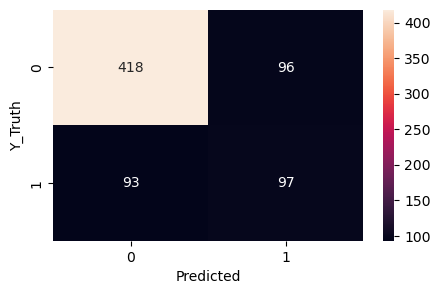

In [115]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize = (5,3))
sn.heatmap(cm,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Y_Truth')

In [116]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       514
           1       0.50      0.51      0.51       190

    accuracy                           0.73       704
   macro avg       0.66      0.66      0.66       704
weighted avg       0.73      0.73      0.73       704



In [ ]:
Take this dataset for bank customer churn prediction : 
    https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

1) Build a deep learning model to predict churn rate at bank. 

2) Once model is built, print classification report and analyze precision, recall and f1-score 